In [1]:
from pystac_client import Client
import requests
import rasterio
import matplotlib.pyplot as plt
stac_url = "https://pgstac-backend.apps.silver.devops.gov.bc.ca/"

In [2]:
catalog = Client.open(stac_url)

catalog.title

#fetch metadata
response=requests.get(stac_url)
data=response.json()

#print metadata
print(f"Title: {data.get('title')}")
print(f"Description: {data.get('description')}")
print(f"STAC Version: {data.get('stac_version')}")
print(f"Conforms To: {data.get('conformsTo')}")
print("\nAvailable Collections:")
for collection in data.get("links", []):
    if collection.get("rel") == "child":
        print(f"- {collection['title']} ({collection['href']})")

Title: stac-fastapi
Description: stac-fastapi
STAC Version: 1.0.0
Conforms To: ['http://www.opengis.net/spec/cql2/1.0/conf/basic-cql2', 'http://www.opengis.net/spec/cql2/1.0/conf/cql2-json', 'http://www.opengis.net/spec/cql2/1.0/conf/cql2-text', 'http://www.opengis.net/spec/ogcapi-common-2/1.0/conf/simple-query', 'http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/core', 'http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/geojson', 'http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/oas30', 'http://www.opengis.net/spec/ogcapi-features-3/1.0/conf/features-filter', 'http://www.opengis.net/spec/ogcapi-features-3/1.0/conf/filter', 'https://api.stacspec.org/v1.0.0-rc.1/collection-search', 'https://api.stacspec.org/v1.0.0-rc.1/collection-search#fields', 'https://api.stacspec.org/v1.0.0-rc.1/collection-search#filter', 'https://api.stacspec.org/v1.0.0-rc.1/collection-search#free-text', 'https://api.stacspec.org/v1.0.0-rc.1/collection-search#query', 'https://api.stacspec.org/v1.0.0-

In [14]:
# Search for HRDEM LiDAR DSM collection

# Define a bounding box: [min_lon, min_lat, max_lon, max_lat]]
bbox = [-126.2, 51.5, -121.0, 53.0]
# Define a time range: "start_date/end_date"
time_range = "2018-01-01/2023-12-31"
search = catalog.search(collections=["DEM"],
                        bbox=bbox,
                        datetime=time_range) 

items = search.item_collection()

# Print out basic info
print(f"Found {len(items)} item(s).")
if len(items) > 0:
    first_item = items[0]
    asset = first_item.assets[list(first_item.assets.keys())[0]]
    dem_url = asset.href
    print(f"DEM URL: {dem_url}")

Found 54 item(s).
DEM URL: https://nrs.objectstore.gov.bc.ca/gdwuts/092/092o/2023/dem/bc_092o074_xli1m_utm10_20231006_20240510.tif


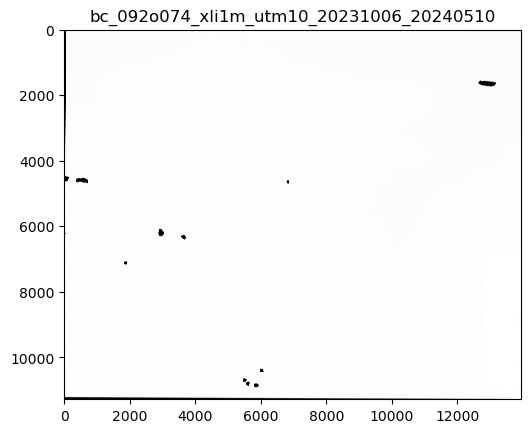

In [15]:
     # Load with rasterio and plot in grayscale
with rasterio.open(dem_url) as src:
    dem_data = src.read(1)
    plt.imshow(dem_data, cmap='gray')
    plt.title(item.id)
    #plt.colorbar(label='Elevation (m)')
    plt.show()
